<a target="_blank" href="https://colab.research.google.com/github/D4san/MultiREx-public/blob/main/examples/quickstart.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## External dependencies

If you are workin in Google Colab use this to install dependencies. When installing `multirex`, `taurex3` is automatically installed.

In [2]:
import sys 
if 'google.colab' in sys.modules:
    !pip install -Uq multirex

In [3]:
import multirex as mrex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# This is for developing purposes
%load_ext autoreload 
%autoreload 2

multirex version 0.1.4


## Creating a single system

In [4]:
# Radii and masses are in solar units
star=mrex.Star(temperature=5777,radius=1,mass=1)

# For planets we assume earth units (earth mass and radius)
planet=mrex.Planet(radius=1,mass=1)

# Atmospher
atmo=mrex.Atmosphere(
    temperature=288, # in K
    base_pressure=1e5, # in Pa
    top_pressure=1, # in Pa
    fill_gas="N2", # the gas that fills the atmosphere
    composition=dict(
        CO2=-4, # This is the log10(mix-ratio)
    )
)
planet.set_atmosphere(atmo)

# sma is semimajar axis in AU as used in TauREx 
system=mrex.System(star=star,planet=planet,sma=1)

**create a list of gasses**

In [5]:
mrex.Util.list_gasses()
mrex.Util.get_gasses()
mrex.Util.get_stellar_spectra()

AttributeError: module 'multirex' has no attribute 'Util'

Let's create the transmission model:

In [ ]:
system.make_transmission_model()

For example we can visualize the spectrum of the planet. But first we must define a range of wavenumbers, we can use the `wavenumber_grid` function to do this.

In [ ]:
# wl in microns
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)
wn[:10]

array([333.33333333, 334.87347378, 336.42073033, 337.97513585,
       339.53672339, 341.10552611, 342.68157736, 344.26491064,
       345.85555958, 347.45355799])

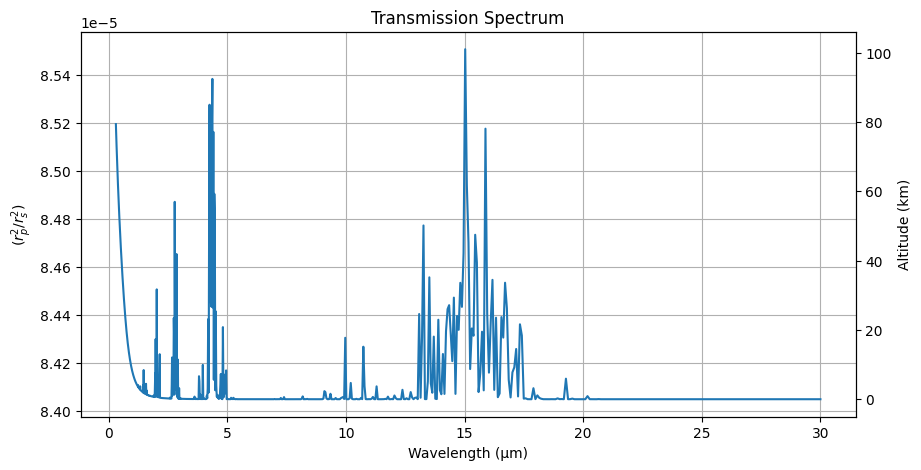

In [ ]:
ax,fig = system.plot_spectrum(wn_grid=wn,title="Transmission Spectrum")

You can manipulate your figure:

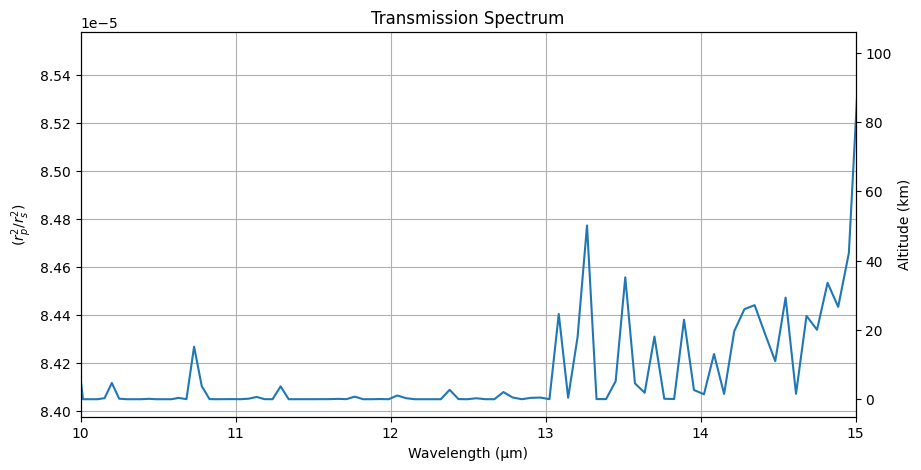

In [ ]:
ax.set_xlim(10,15)
fig

Now we can show contibutions:

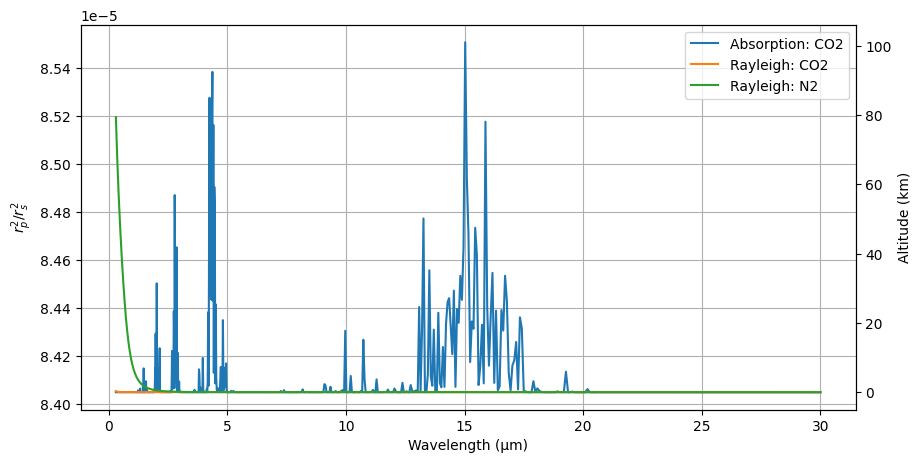

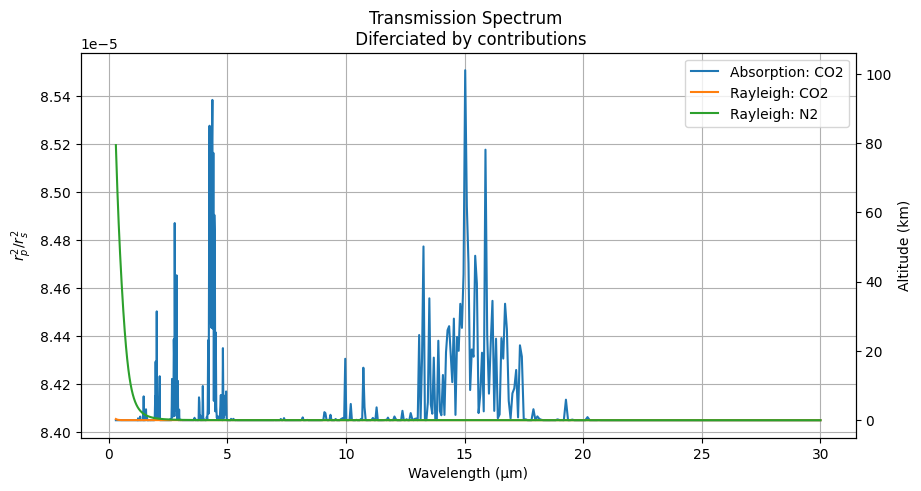

In [ ]:
ax,fig = system.plot_full_spectrum(wn_grid=wn) ## Add option showfig = False, plot_contributions(..., showspectrum=True)
ax.set_title("Transmission Spectrum \n Diferciated by contributions")
fig

In [21]:
spectra.describe()

,sma,seed,p radius,p mass,p seed,atm temperature,atm base_pressure,atm top_pressure,atm seed,atm CO2,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
count,10.0,1.000000e+00,10.0,10.0,1.000000e+00,10.0,10.0,10.0,1.000000e+00,10.0,...,1.000000e+01,10.000000,1.000000e+01,10.000000,1.000000e+01,10.000000,1.000000e+01,10.000000,10.000000,10.000000
mean,1.0,1.710782e+09,1.0,1.0,1.710782e+09,288.0,100000.0,1.0,1.710782e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,0.000085,8.517231e-05,0.000085,8.518152e-05,0.000085,0.000085,0.000085
std,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,...,1.428562e-20,0.000000,1.428562e-20,0.000000,1.428562e-20,0.000000,1.428562e-20,0.000000,0.000000,0.000000
min,1.0,1.710782e+09,1.0,1.0,1.710782e+09,288.0,100000.0,1.0,1.710782e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,0.000085,8.517231e-05,0.000085,8.518152e-05,0.000085,0.000085,0.000085
25%,1.0,1.710782e+09,1.0,1.0,1.710782e+09,288.0,100000.0,1.0,1.710782e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,0.000085,8.517231e-05,0.000085,8.518152e-05,0.000085,0.000085,0.000085
50%,1.0,1.710782e+09,1.0,1.0,1.710782e+09,288.0,100000.0,1.0,1.710782e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,0.000085,8.517231e-05,0.000085,8.518152e-05,0.000085,0.000085,0.000085
75%,1.0,1.710782e+09,1.0,1.0,1.710782e+09,288.0,100000.0,1.0,1.710782e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,0.000085,8.517231e-05,0.000085,8.518152e-05,0.000085,0.000085,0.000085
max,1.0,1.710782e+09,1.0,1.0,1.710782e+09,288.0,100000.0,1.0,1.710782e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,0.000085,8.517231e-05,0.000085,8.518152e-05,0.000085,0.000085,0.000085


## Creating a Multiverse

First we can create the components of a planetary system.

In [9]:
stars = mrex.Star(temperature=5777,radius=1,mass=1)
planets = mrex.Planet(radius=1,mass=1)
atmos=mrex.Atmosphere(
    temperature=288, # in K
    base_pressure=1e5, # in Pa
    top_pressure=1, # in Pa
    fill_gas="N2", # the gas that fills the atmosphere
    composition=dict(
        CO2=(-4,-1), # This is the range of log10(mix-ratio) of CO2
        H2O=(-4,-2),
        CH4=(-6,-3),
        O3=-6
    )
)
planets.set_atmosphere(atmos)
systems=mrex.System(star=stars,planet=planets,sma=1)
systems.make_transmission_model()


Now we can initialize our model and use the other features of multirex.

Now we can generate a dataset spectra varying the parameters who we define as a range, and addionally we can add noise based on the signal to noise ratio to generate a set of observations.

Optionally we can add a label based on the presence of a molecule in the atmosphere.


In [10]:
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)
data = systems.explore_multiverse(
    wn_grid=wn,
    snr=10,
    n_iter=10, # n_universes : Number of universes. One planet per universe with properties drawn from the priors 
    labels="O3",
    n_observations=1000, # Number of observations per universe
    header=True, # Add header to the observations
)
# This will produce 10 000 observations in total
"""
spectra=True,
observations=True, # Give me the observations
"""

Exploring universes:   0%|          | 0/10 [00:00<?, ?it/s]

Exploring universes: 100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


Generating observations for 10 spectra...


'\nspectra=True,\nobservations=True, # Give me the observations\n'

In [11]:
#data.spectra, data.obs
#data['spectra'], data['obs']
#data.keys()
spectra,obs = data

In [12]:
spectra

,sma,seed,p radius,p mass,p seed,atm temperature,atm base_pressure,atm top_pressure,atm fill_gas,atm seed,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
0,1,1.710782e+09,1,1,1.710782e+09,288,100000.0,1,N2,1.710782e+09,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
1,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
3,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
4,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
5,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
6,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
7,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
8,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
9,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085


As you can see the planets are the same since you don't include variations in the properties of the planets.

In [14]:
obs.describe()

,SNR,29.999999999999996,29.862024862864565,29.72468429701139,29.58797538393846,29.451895218566502,29.31644090917717,29.181609577351622,29.04739835790937,28.913804398847354,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
count,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,10.0,8.404905e-05,8.414906e-05,8.405031e-05,8.405214e-05,8.405080e-05,8.411111e-05,8.407842e-05,8.405009e-05,8.412557e-05,...,8.515215e-05,8.515350e-05,8.515936e-05,8.516175e-05,8.516664e-05,8.517376e-05,8.517702e-05,8.518447e-05,8.518774e-05,8.519066e-05
std,0.0,2.103537e-07,2.180171e-07,2.101300e-07,2.093440e-07,2.094849e-07,2.111840e-07,2.102982e-07,2.101659e-07,2.063509e-07,...,2.087216e-07,2.075503e-07,2.051145e-07,2.069261e-07,2.088567e-07,2.073454e-07,2.076352e-07,2.081916e-07,2.111015e-07,2.093327e-07
min,10.0,8.299090e-05,8.329864e-05,8.314108e-05,8.314452e-05,8.323394e-05,8.330193e-05,8.325222e-05,8.321973e-05,8.320650e-05,...,8.433790e-05,8.434704e-05,8.439272e-05,8.439850e-05,8.420239e-05,8.439338e-05,8.428450e-05,8.436316e-05,8.437146e-05,8.434589e-05
25%,10.0,8.390859e-05,8.400296e-05,8.391145e-05,8.391322e-05,8.391089e-05,8.396781e-05,8.393937e-05,8.390969e-05,8.398696e-05,...,8.501209e-05,8.501667e-05,8.502523e-05,8.502598e-05,8.502714e-05,8.503744e-05,8.504360e-05,8.504689e-05,8.504835e-05,8.505223e-05
50%,10.0,8.404926e-05,8.414724e-05,8.405033e-05,8.405322e-05,8.405335e-05,8.410794e-05,8.407558e-05,8.404843e-05,8.412365e-05,...,8.515134e-05,8.515383e-05,8.515761e-05,8.516067e-05,8.516930e-05,8.517378e-05,8.517914e-05,8.518628e-05,8.518602e-05,8.519012e-05
75%,10.0,8.419035e-05,8.429126e-05,8.418977e-05,8.419115e-05,8.418932e-05,8.425083e-05,8.421855e-05,8.418829e-05,8.425914e-05,...,8.529091e-05,8.529373e-05,8.529685e-05,8.529694e-05,8.530459e-05,8.531052e-05,8.531417e-05,8.532025e-05,8.532790e-05,8.533187e-05
max,10.0,8.496688e-05,8.503778e-05,8.486024e-05,8.489058e-05,8.488565e-05,8.490093e-05,8.492669e-05,8.499461e-05,8.508665e-05,...,8.598387e-05,8.589485e-05,8.595357e-05,8.594858e-05,8.604937e-05,8.597008e-05,8.599784e-05,8.603126e-05,8.608185e-05,8.605852e-05


In [15]:
obs["atm CO2"].value_counts()

atm CO2
-1.0734479912329604    1000
-1.154217127499546     1000
-2.3303369255486666    1000
-2.691329342275775     1000
-3.6109457572067902    1000
-3.0833635224132183    1000
-2.4189622491662526    1000
-2.9460977296610125    1000
-2.6079534191129605    1000
-1.7430506452020178    1000
Name: count, dtype: int64

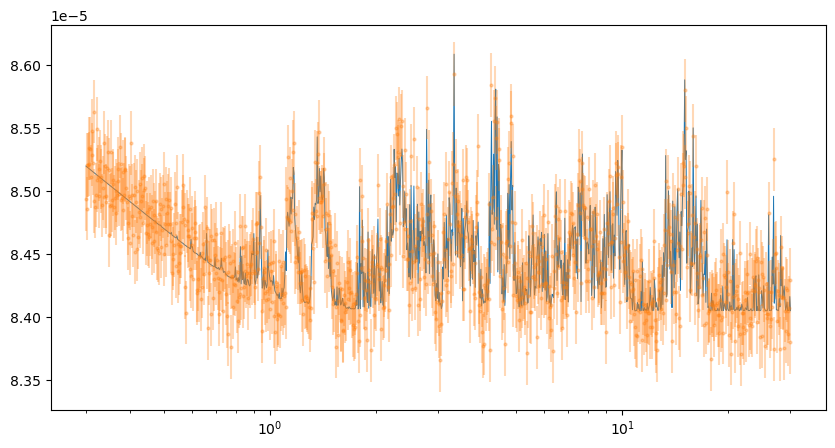

In [37]:
##
plt.figure(figsize=(10,5))
plt.plot(spectra.iloc[0,-1000:],label="True Spectrum",linewidth=0.7)
# obs.iloc[0,obs.channels], obs.channels = -1000:
# obs.spectra = obs.iloc[:,-1000:]	
plt.errorbar(x=1e4/wn,y=obs.iloc[0,-1000:],yerr=(max(obs.iloc[1,-1000:])-min(obs.iloc[1,-1000:]))/obs.loc[0,"SNR"]
             ,label="Observed Spectrum",fmt="o",markersize=2,alpha=0.3)
plt.xscale("log")